In [1]:
pip install python-mnist

In [2]:
import numpy as np

class Calculator:
    @staticmethod
    def sigmoid(x):
        return 1/(1+np.exp(-x))

    @staticmethod
    def sigmoid_der(x):
        return Calculator.sigmoid(x) *(1 - Calculator.sigmoid (x))

    @staticmethod
    def softmax(x):
        exps = np.exp(x - x.max())
        return exps / np.sum(exps, axis=0)

    @staticmethod
    def softmax_der(x):
        exps = np.exp(x - x.max())
        return exps / np.sum(exps, axis=0) * (1 - exps / np.sum(exps, axis=0))


In [3]:
from mnist import MNIST
import random
import numpy as np

class DataProvider():
    def __init__(self, train_images_np, train_labels_np, test_images_np, test_labels_np):
        self.train_images_np = train_images_np
        self.train_labels_np = train_labels_np
        self.train_labels_hot_encoded = DataProvider.one_hot_encode(train_labels_np)

        self.test_images_np = test_images_np
        self.test_labels_np = test_labels_np
        self.test_labels_hot_encoded = DataProvider.one_hot_encode(test_labels_np)

    @staticmethod
    def load_from_folder(folder_name):
        mndata = MNIST(folder_name)
        mndata.gz = True

        train_images, train_labels = mndata.load_training()
        train_images_np = (np.array(train_images)/255).astype('float32')
        train_labels_np = np.array(train_labels)
        
        test_images, test_labels = mndata.load_testing()
        test_images_np = (np.array(test_images)/255).astype('float32')
        test_labels_np = np.array(test_labels)
        
        return DataProvider(train_images_np, train_labels_np, test_images_np, test_labels_np)

    def get_train_x(self):
        return self.train_images_np

    def get_train_y(self):
        return self.train_labels_np
        
    def get_hot_encoded_train_y(self):
        return self.train_labels_hot_encoded

    def get_test_x(self):
        return self.test_images_np

    def get_test_y(self):
        return self.test_labels_np
        
    def get_hot_encoded_test_y(self):
        return self.test_labels_hot_encoded

    @staticmethod
    def one_hot_encode(labels):
        num_of_labels = len(labels)
        num_of_classes = np.max(labels) + 1

        one_hot_labels = np.zeros((num_of_labels, num_of_classes))

        for i in range(num_of_labels):
            one_hot_labels[i, labels[i]] = 1
        
        return one_hot_labels


In [4]:
import numpy as np
import time

class NeuralNet():
    def __init__(self, sizes, epochs=10, l_rate=0.001):
        self.sizes = sizes
        self.epochs = epochs
        self.l_rate = l_rate

        self.params = self.initialize_parameters()

    def initialize_parameters(self):
        input_layer=self.sizes[0]
        hidden_1=self.sizes[1]
        output_layer=self.sizes[2]

        params = {
            'W1': np.random.randn(hidden_1, input_layer) / np.sqrt( hidden_1),
            'W2': np.random.randn(output_layer, hidden_1) / np.sqrt( output_layer),
        }

        return params

    def forward_progation(self, x_train):
        params = self.params

        # input layer activations becomes sample
        params['A0'] = x_train

        # input layer to hidden layer 1
        params['Z1'] = np.dot(params["W1"], params['A0'])
        params['A1'] = Calculator.sigmoid(params['Z1'])

        # hidden layer 2 to output layer
        params['Z2'] = np.dot(params["W2"], params['A1'])
        params['A2'] = Calculator.softmax(params['Z2'])

        return params['A2']

    def backward_progation(self, y_train, output):
        params = self.params
        change_w = {}

        # Calculate W2 update
        error = 2 * (output - y_train) / output.shape[0] * Calculator.softmax_der(params['Z2'])
        change_w['W2'] = np.outer(error, params['A1'])

        # Calculate W1 update
        error = np.dot(params['W2'].T, error) * Calculator.sigmoid_der(params['Z1'])
        change_w['W1'] = np.outer(error, params['A0'])

        return change_w

    def update_parameters(self, changes_to_w):
        for key, value in changes_to_w.items():
            self.params[key] -= self.l_rate * value

    def compute_accuracy(self, x_val, y_val):
        predictions = []

        for x, y in zip(x_val, y_val):
            output = self.forward_progation(x)
            pred = np.argmax(output)
            predictions.append(pred == np.argmax(y))
        
        return np.mean(predictions)

    def train(self, x_train, y_train, x_val, y_val):
        start_time = time.time()
        for iteration in range(self.epochs):
            for x,y in zip(x_train, y_train):
                output = self.forward_progation(x)
                changes_to_w = self.backward_progation(y, output)
                self.update_parameters(changes_to_w)
            
            accuracy = self.compute_accuracy(x_val, y_val)
            print('Epoch: {0}, Time Spent: {1:.2f}s, Accuracy: {2:.2f}%'.format(
                iteration+1, time.time() - start_time, accuracy * 100
            ))


train data
occurance of  0 = 5923
occurance of  1 = 6742
occurance of  2 = 5958
occurance of  3 = 6131
occurance of  4 = 5842
occurance of  5 = 5421
occurance of  6 = 5918
occurance of  7 = 6265
occurance of  8 = 5851
occurance of  9 = 5949


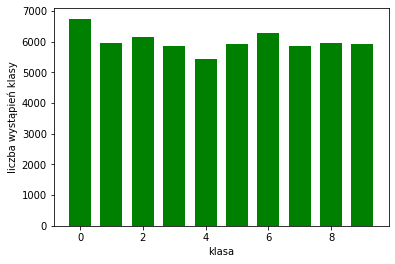

test data
occurance of  0 = 980
occurance of  1 = 1135
occurance of  2 = 1032
occurance of  3 = 1010
occurance of  4 = 982
occurance of  5 = 892
occurance of  6 = 958
occurance of  7 = 1028
occurance of  8 = 974
occurance of  9 = 1009


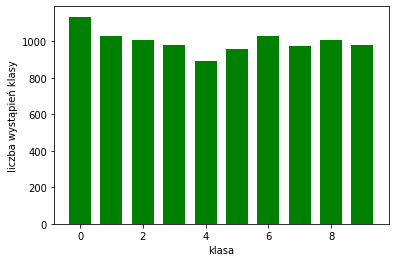

Epoch: 1, Time Spent: 49.54s, Accuracy: 53.19%
Epoch: 2, Time Spent: 99.24s, Accuracy: 69.04%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Testing:
    @staticmethod
    def data_analysis():
        dp = DataProvider.load_from_folder('samples')

        train_y = dp.get_train_y()
        print("train data")
        y_value=np.zeros((1,10))
        for i in range (10):
            print("occurance of ",i,"=",np.count_nonzero(train_y==i))
            y_value[0,i-1] = np.count_nonzero(train_y==i)
        
        y_value=y_value.ravel()
        x_value=[0,1,2,3,4,5,6,7,8,9]
        plt.xlabel('klasa')
        plt.ylabel('liczba wystąpień klasy')
        plt.bar(x_value,y_value,0.7,color='g')
        plt.show()

        
        test_y = dp.get_test_y()
        print("test data")
        y_value=np.zeros((1,10))
        for i in range (10):
            print("occurance of ",i,"=",np.count_nonzero(test_y==i))
            y_value[0,i-1] = np.count_nonzero(test_y==i)
        
        y_value=y_value.ravel()
        x_value=[0,1,2,3,4,5,6,7,8,9]
        plt.xlabel('klasa')
        plt.ylabel('liczba wystąpień klasy')
        plt.bar(x_value,y_value,0.7,color='g')
        plt.show()
    
    @staticmethod
    def example():
        dp = DataProvider.load_from_folder('samples')

        nn = NeuralNet(sizes=[784, 128, 10])
        nn.train(dp.get_train_x(), dp.get_hot_encoded_train_y(), dp.get_test_x(), dp.get_hot_encoded_test_y())

Testing.data_analysis()
Testing.example()

